In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('../../data/processed_data/processed_data.csv')
df.head()

,ano,State,Value,mes_5_PRCP,mes_6_PRCP,mes_7_PRCP,mes_8_PRCP,mes_5_TMean,mes_6_TMean,mes_7_TMean,...,mes_7_TMAX,mes_8_TMAX,mes_5_TMIN,mes_6_TMIN,mes_7_TMIN,mes_8_TMIN,mes_5_diff,mes_6_diff,mes_7_diff,mes_8_diff
0,1973,ARKANSAS,35.0,42.308973,45.402410,35.477990,15.372602,193.839225,246.650481,268.067658,...,328.655244,326.769319,125.061019,183.932673,207.498746,187.769055,137.549066,125.435617,121.134969,139.004812
1,1974,ARKANSAS,44.0,44.904795,72.178190,20.984679,47.830850,219.738361,225.039917,274.031891,...,343.424095,314.035861,161.500496,162.957676,204.639687,189.845442,116.451663,124.155148,138.784408,124.165425
2,1975,ARKANSAS,50.0,51.879732,42.705725,27.444048,34.489151,216.171408,244.717019,263.674473,...,327.976356,319.033057,155.817551,183.790625,199.373975,202.361080,120.710481,121.846539,128.583133,116.680717
3,1976,ARKANSAS,56.0,43.245414,50.554939,21.466434,13.742867,177.125868,229.556643,261.141791,...,327.687374,325.192957,111.058260,168.628025,194.599055,173.279941,132.115768,121.857235,133.085472,152.009498
4,1977,ARKANSAS,53.0,16.920457,35.243911,35.796927,26.661465,226.244111,262.637452,277.435751,...,339.202121,328.781318,158.645162,194.591207,215.668843,206.371685,135.186214,136.071042,123.533815,122.375183


Vamos tentar comparar a produtividade dos estados, para procurar entender se há alguma relação entre as posições geográficas.

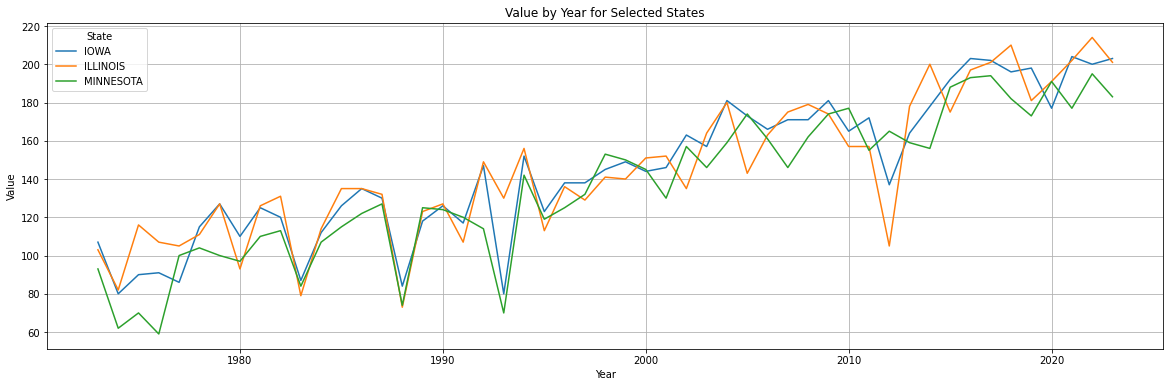

In [23]:
def plot_state_values(df, states):
    """
    Função para plotar os valores ao longo dos anos para um ou mais estados.

    Parâmetros:
        df (pd.DataFrame): DataFrame contendo as colunas 'State', 'ano' e 'Value'.
        states (list of str): Lista contendo os nomes dos estados que deseja plotar.

    Retorna:
        None, mas plota um gráfico de linhas dos valores ao longo dos anos para os estados especificados.
    """

    if not isinstance(states, list):
        states = [states]


    df_filtered = df[df['State'].isin(states)]


    plt.figure(figsize=(20, 6))
    for state in df_filtered['State'].unique():
        df_state = df_filtered[df_filtered['State'] == state]

        anos = np.array(df_state['ano'])
        valores = np.array(df_state['Value'])
        plt.plot(anos, valores, label=state)

    plt.title('Value by Year for Selected States')
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.legend(title='State')
    plt.grid(True)
    plt.show()

plot_state_values(df, ['IOWA', 'ILLINOIS', 'MINNESOTA'])

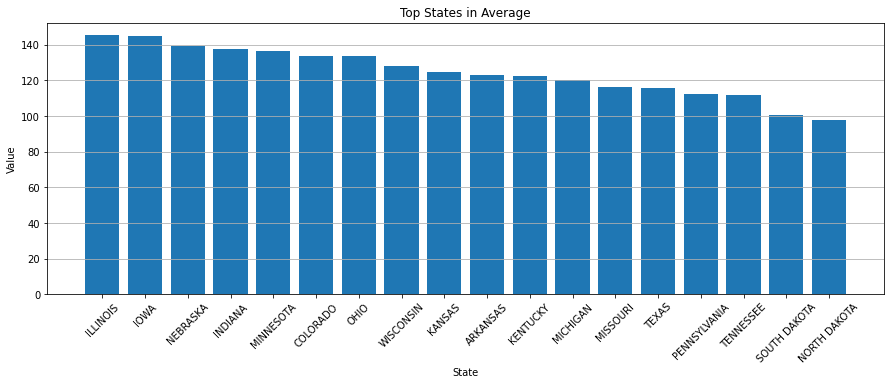

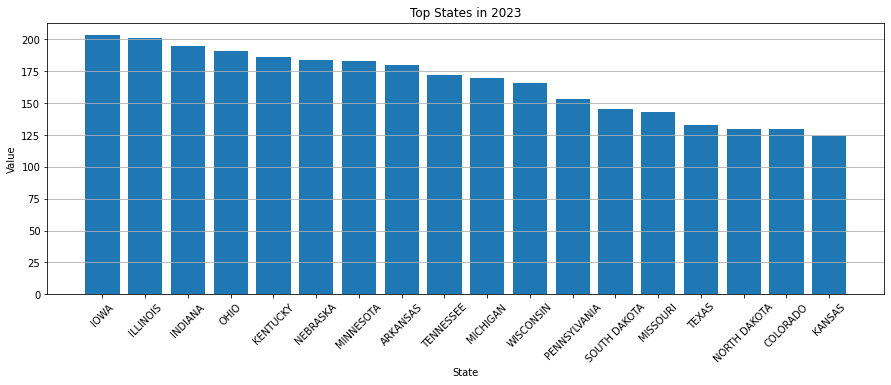

In [55]:
df_mean = df.groupby('State').mean().reset_index()
df_mean = df_mean.sort_values('Value', ascending=False)
df_mean = df_mean[['State', 'Value']]


plt.figure(figsize=(15, 5))
plt.bar(df_mean['State'], df_mean['Value'])
plt.title('Top States in Average')
plt.xlabel('State')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


top_2023 = df[df['ano'] == 2023].sort_values('Value', ascending=False)
top_2023 = top_2023[['State', 'Value']]

plt.figure(figsize=(15, 5))
plt.bar(top_2023['State'], top_2023['Value'])
plt.title('Top States in 2023')
plt.xlabel('State')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Conseguimos notar que os estados que mais produzem milho estão geograficamente perto um aos outros, conferindo na média dos anos e em 2023. então possivelmente a posição geográfica dos estados possui relevância para a produtividade final. Com a função que plota a produtividade ao longo do tempo, conseguimos comparar melhor alguns estados. 

Agora, vamos tentar ver como é o comportamento do clima nesses estados.

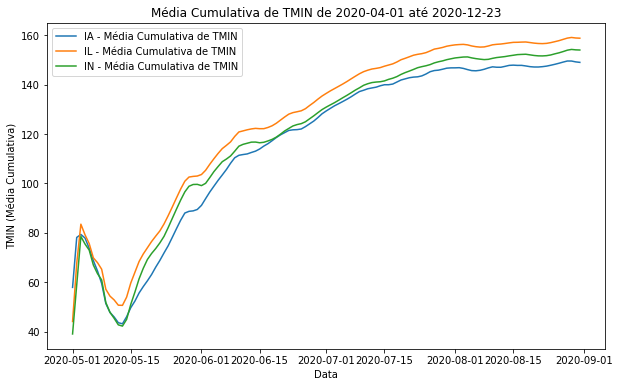

In [107]:
def plot_rolling_average(states, variable, start_date, end_date, date_col='data'):
    plt.figure(figsize=(10, 6))
    
    for state in states:
        csv_path = f'../../data/raw_data_NOAA/by_day_and_state/{state}.csv'
        df = pd.read_csv(csv_path)
        
        df[date_col] = pd.to_datetime(df[date_col])
        

        mask = (df[date_col] >= start_date) & (df[date_col] <= end_date)
        df_filtered = df.loc[mask].copy()
        
        if df_filtered.empty:
            print(f"Nenhum dado encontrado para {state} entre {start_date} e {end_date}. Verifique as datas e tente novamente.")
            continue
        

        df_filtered.sort_values(date_col, inplace=True)
        
        df_filtered[f'{variable}_mean'] = df_filtered[variable].expanding(min_periods=1).mean()
        
        dates_np = np.array(df_filtered[date_col])
        variable_mean_np = np.array(df_filtered[f'{variable}_mean'])
        

        plt.plot(dates_np, variable_mean_np, label=f'{state} - Média Cumulativa de {variable}')

    plt.title(f'Média Cumulativa de {variable} de {start_date} até {end_date}')
    plt.xlabel('Data')
    plt.ylabel(f'{variable} (Média Cumulativa)')
    plt.legend()
    plt.show()


plot_rolling_average(['IA', 'IL', 'IN'], 'TMIN', '2020-04-01', '2020-12-23')


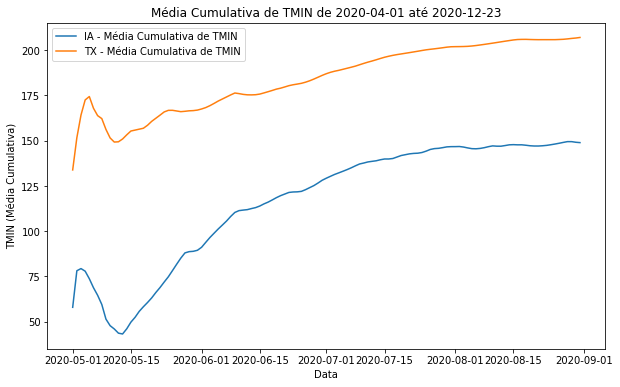

In [108]:
plot_rolling_average(['IA', 'TX'], 'TMIN', '2020-04-01', '2020-12-23')